/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - loss: 0.2307 - val_loss: 0.3263
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1062 - val_loss: 0.0640
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0291 - val_loss: 0.0222
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0241 - val_loss: 0.0480
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0271 - val_loss: 0.0227
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0223 - val_loss: 0.0336
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0274 - val_loss: 0.0249
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0200 - val_loss: 0.0298
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0199 - val_loss: 0.0215
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0218 - val_loss: 0.0269
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0223 - val_loss: 0.0268
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.

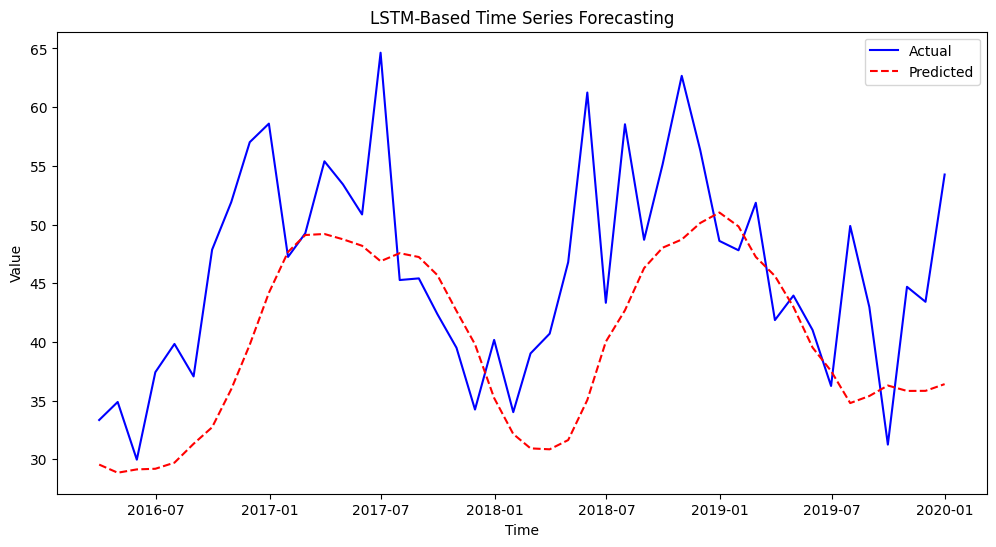

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Step 1: Generate Synthetic Time Series Data
date_rng = pd.date_range(start='2000-01-01', periods=240, freq='ME')  # Monthly Data
np.random.seed(42)

trend = np.linspace(10, 50, 240)  # Linear increasing trend
seasonality = 10 * np.sin(np.linspace(0, 24 * np.pi, 240))  # Seasonal pattern
noise = np.random.normal(scale=5, size=240)  # Random noise

data = trend + seasonality + noise
df = pd.DataFrame({'Date': date_rng, 'Value': data})
df.set_index('Date', inplace=True)

# Step 2: Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Scaled'] = scaler.fit_transform(df[['Value']])

# Step 3: Prepare Data for LSTM Model
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(df['Scaled'].values, time_steps)

# Train-Test Split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Step 4: Build LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Step 5: Train Model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Reverse Scaling
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Step 7: Plot Results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test_inv, label="Actual", color='blue')
plt.plot(df.index[-len(y_pred):], y_pred_inv, label="Predicted", color='red', linestyle='dashed')
plt.legend()
plt.title("LSTM-Based Time Series Forecasting")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()
